Sampling: [alpha, beta, y_obs]


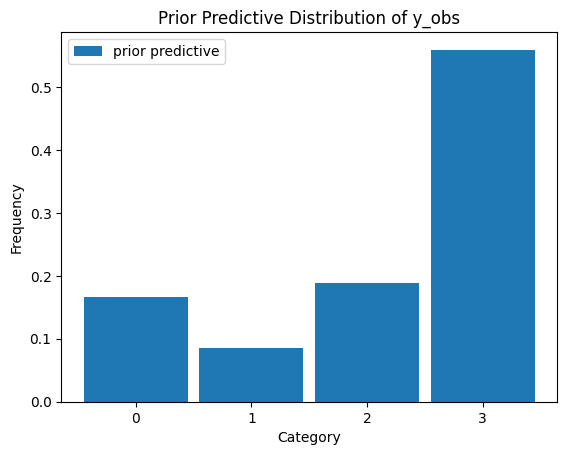

In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
from bayes_ordinal.models.cumulative import cumulative_model
from bayes_ordinal.workflow.prior_predictive import run_prior_predictive

# Tiny fake data
n, K = 50, 4
X = np.random.normal(size=(n, 2))
y = np.random.randint(0, K, size=n)

model = cumulative_model(y, X, K)
idata_pp = run_prior_predictive(model, draws=100, plot=True)


In [5]:
from bayes_ordinal.workflow.fitting import fit_model

# Smoke‐test to catch any errors quickly
idata_smoke = fit_model(model, smoke_test=True)

# Then a full run
idata_full = fit_model(model, draws=500, tune=500)


Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, beta]


Sampling 1 chain for 10 tune and 10 draw iterations (10 + 10 draws total) took 0 seconds.
The number of samples is too small to check convergence reliably.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


/Users/adithyan/Documents/MScProject/bayes_ordinal/.venv/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 1 seconds.


In [6]:
idata_smoke.posterior

<xarray.Dataset>
Dimensions:            (chain: 1, draw: 10, beta_dim_0: 2, alpha_dim_0: 3,
                        y_obs_probs_dim_0: 50, y_obs_probs_dim_1: 4)
Coordinates:
  * chain              (chain) int64 0
  * draw               (draw) int64 0 1 2 3 4 5 6 7 8 9
  * beta_dim_0         (beta_dim_0) int64 0 1
  * alpha_dim_0        (alpha_dim_0) int64 0 1 2
  * y_obs_probs_dim_0  (y_obs_probs_dim_0) int64 0 1 2 3 4 5 ... 45 46 47 48 49
  * y_obs_probs_dim_1  (y_obs_probs_dim_1) int64 0 1 2 3
Data variables:
    beta               (chain, draw, beta_dim_0) float64 0.1804 ... -0.06104
    alpha              (chain, draw, alpha_dim_0) float64 -1.483 ... 1.039
    y_obs_probs        (chain, draw, y_obs_probs_dim_0, y_obs_probs_dim_1) float64 ...
Attributes:
    created_at:                 2025-07-29T10:40:01.068469
    arviz_version:              0.16.1
    inference_library:          pymc
    inference_library_version:  5.3.1
    sampling_time:              0.01742410659790039
    tuning_steps:               10

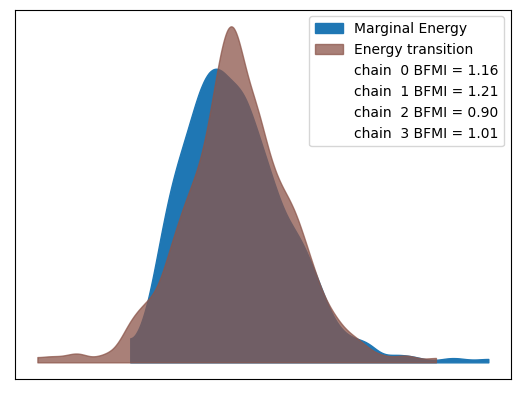

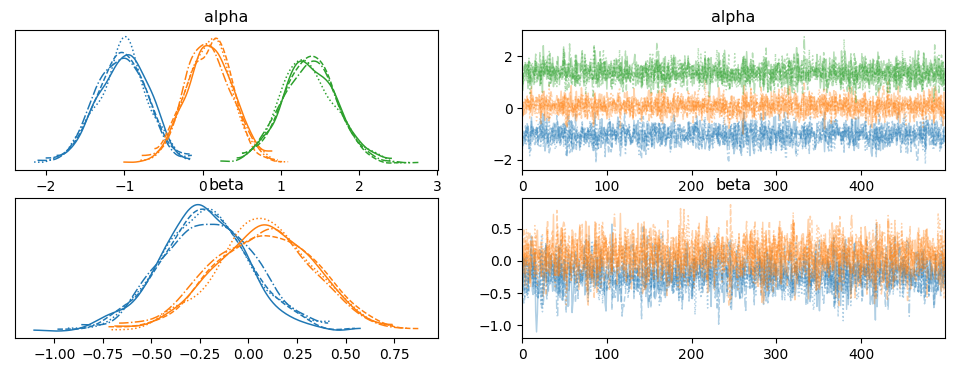

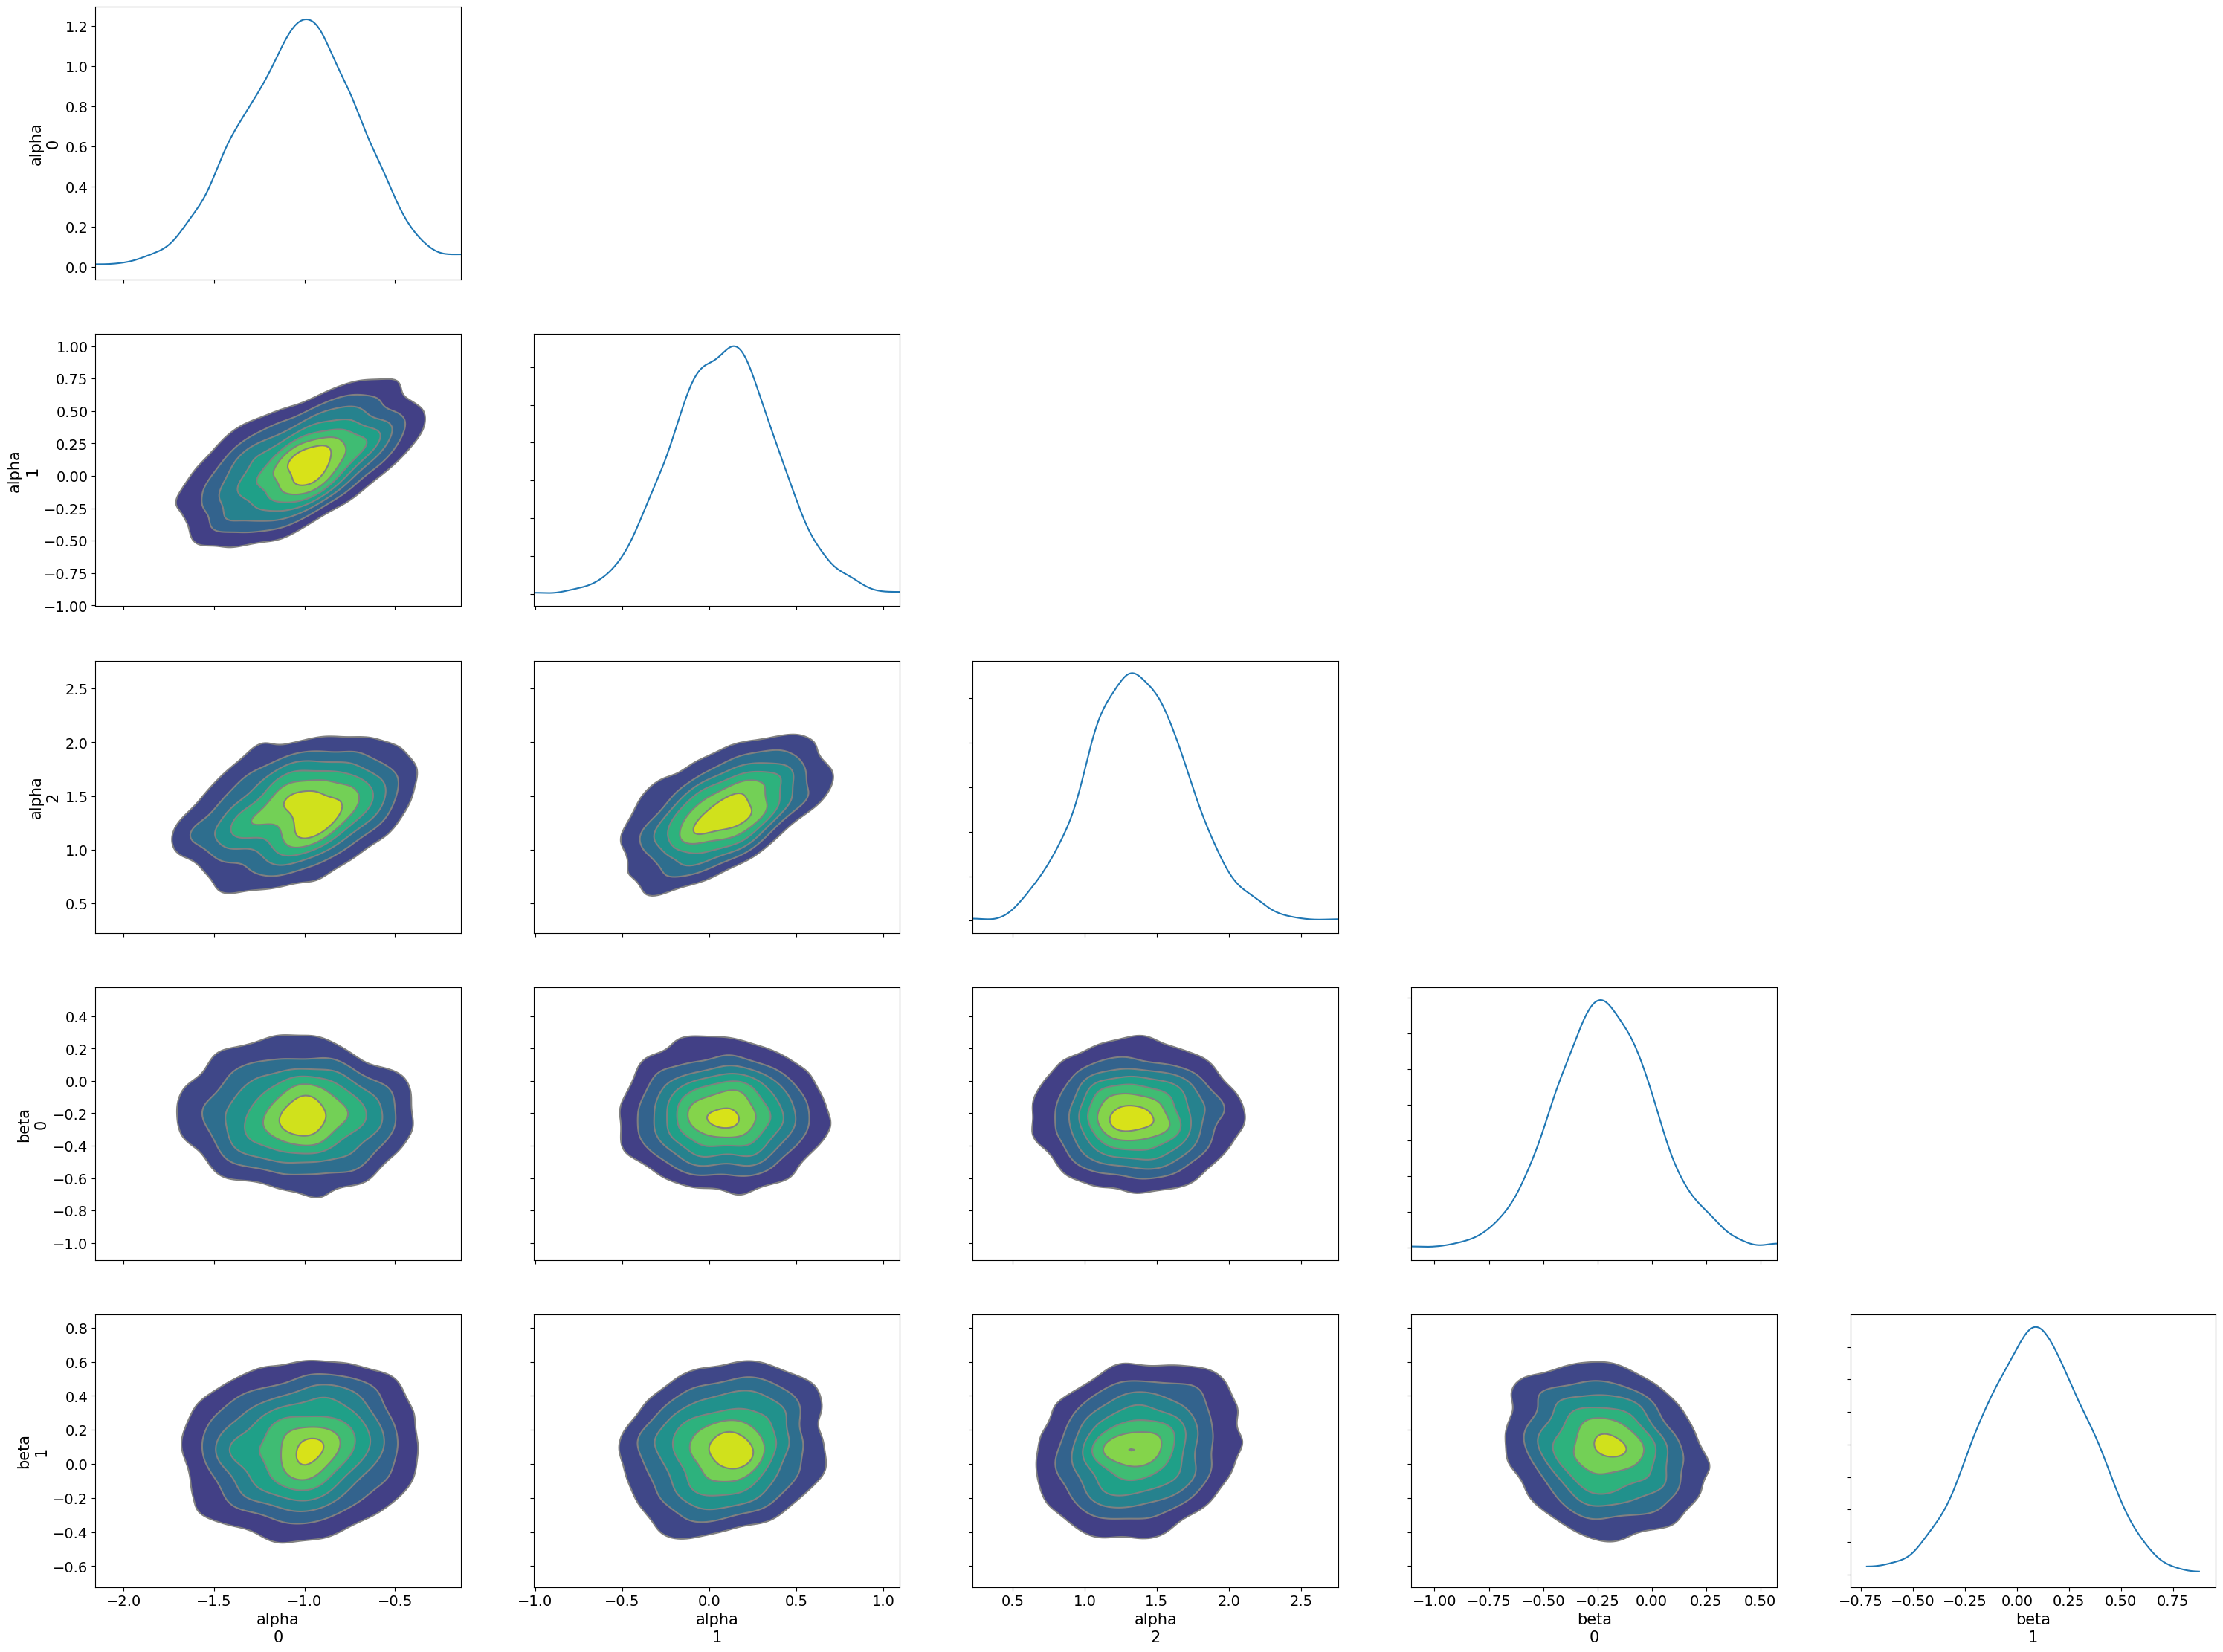

          mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
alpha[0] -1.03  0.32   -1.65    -0.46       0.01     0.01   1892.79   1749.51   
alpha[1]  0.08  0.30   -0.43     0.67       0.01     0.01   2678.59   1895.72   
alpha[2]  1.37  0.35    0.70     2.02       0.01     0.00   3119.46   1892.66   
beta[0]  -0.22  0.23   -0.67     0.22       0.01     0.00   1757.01   1426.34   
beta[1]   0.08  0.26   -0.41     0.56       0.01     0.00   2258.94   1655.82   

          r_hat  n_divergences  max_energy_diff  
alpha[0]    1.0              0         8.338252  
alpha[1]    1.0              0         8.338252  
alpha[2]    1.0              0         8.338252  
beta[0]     1.0              0         8.338252  
beta[1]     1.0              0         8.338252  


In [7]:
from bayes_ordinal.workflow.diagnostics import summarize_diagnostics

# Summarize diagnostics for alpha and beta
diag_table = summarize_diagnostics(idata_full, var_names=["alpha", "beta"])
print(diag_table)

Sampling: [y_obs]


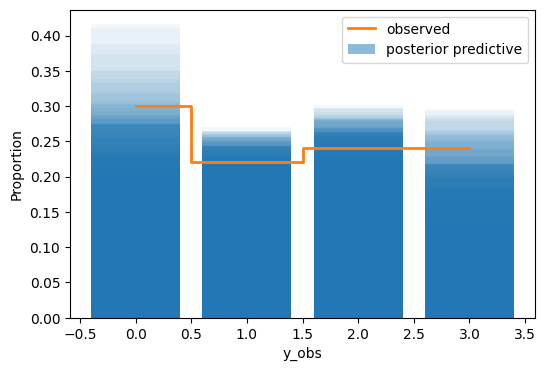

In [8]:
from bayes_ordinal.workflow.posterior_predictive import run_posterior_predictive
# 2) Posterior predictive
pp_idata = run_posterior_predictive(model, idata_full, var_name="y_obs")

Sampling: [y_obs]


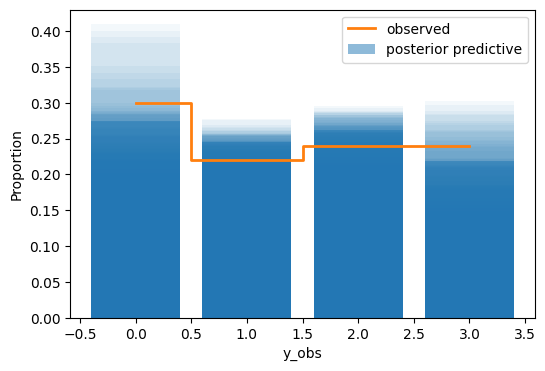

In [9]:
pp_idata = run_posterior_predictive(model, idata_full, var_name="y_obs", kind="proportions")

Sampling: [y_obs]


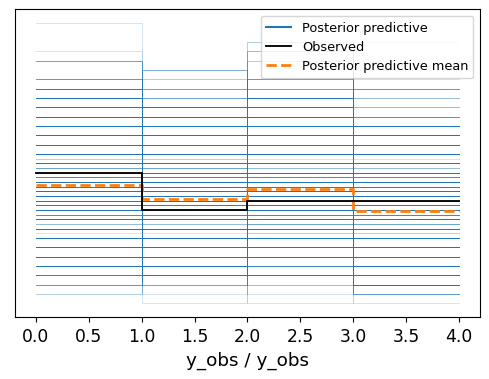

In [10]:
pp_idata = run_posterior_predictive(model, idata_full, var_name="y_obs", kind="hist")

Sampling: [y_obs]


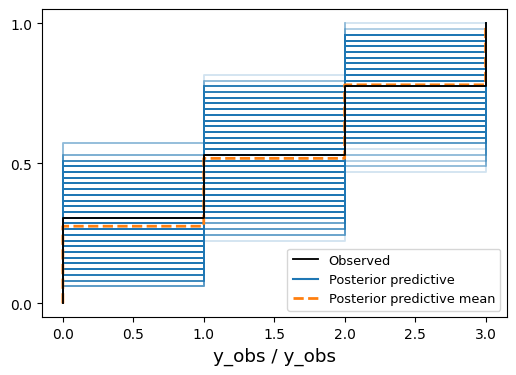

In [11]:
pp_idata = run_posterior_predictive(model, idata_full, var_name="y_obs", kind="ecdf")

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


/Users/adithyan/Documents/MScProject/bayes_ordinal/.venv/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gamma, beta]


Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 0 seconds.


            rank    elpd_loo     p_loo  elpd_diff  weight        se       dse  \
partial        0  147.786222  5.748903   0.000000     1.0  3.244730  0.000000   
cumulative     1  149.197207  5.926886   1.410985     0.0  2.491676  1.978119   

            warning     scale  n_bad_k  
partial       False  deviance        0  
cumulative    False  deviance        0  


/Users/adithyan/Documents/MScProject/bayes_ordinal/.venv/lib/python3.11/site-packages/arviz/stats/stats.py:307: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (
/Users/adithyan/Documents/MScProject/bayes_ordinal/.venv/lib/python3.11/site-packages/arviz/stats/stats.py:307: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'deviance' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (
/Users/adithyan/Documents/MScProject/bayes_ordinal/.venv/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/compareplot.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labe

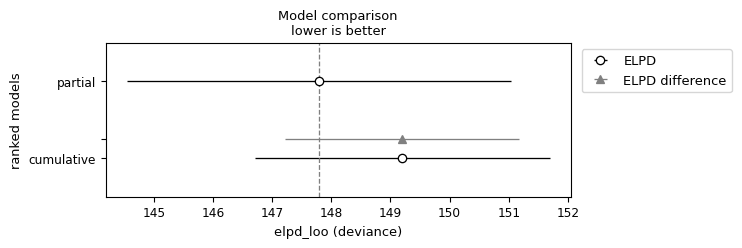

In [12]:
from bayes_ordinal.models.cumulative import cumulative_model
from bayes_ordinal.models.partial_odds import partial_odds_model
from bayes_ordinal.workflow.fitting import fit_model
from bayes_ordinal.workflow.cross_validation import compare_models
import arviz as az
import matplotlib.pyplot as plt

# 1) Build two models on the same data
model1 = cumulative_model(y, X, K)
model2 = partial_odds_model(y, X, K)

# 2) Fit both
idata1 = fit_model(model1, draws=500, tune=500)
idata2 = fit_model(model2, draws=500, tune=500)

# 3) Compute log_likelihood group if not already added
#    (PyMC 5 automatically stores it if you observed through pm.sample.)
#    Otherwise you can add via az.add_log_likelihood.

# 4) Compare
comp_df = compare_models(
    models={"cumulative": model1, "partial": model2},
    idatas={"cumulative": idata1, "partial": idata2},
    ic="loo"
)
print(comp_df)
az.plot_compare(comp_df)
plt.show()


Only 300 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]
Sampling 4 chains for 300 tune and 300 draw iterations (1_200 + 1_200 draws total) took 0 seconds.
Only 300 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]
Sampling 4 chains for 300 tune and 300 draw iterations (1_200 + 1_200 draws total) took 0 seconds.
Only 300 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]
Sampling 4 chains for 300 tune and 300 draw iterations (1_200 + 1_200 draws total) took 0 seconds.
Only 300 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]
Sampling 4 chains for 300 tune and 300 

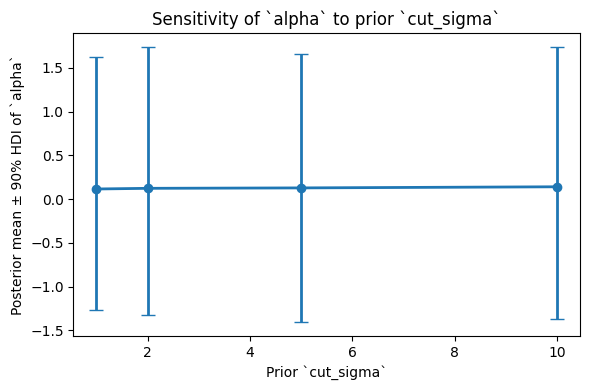

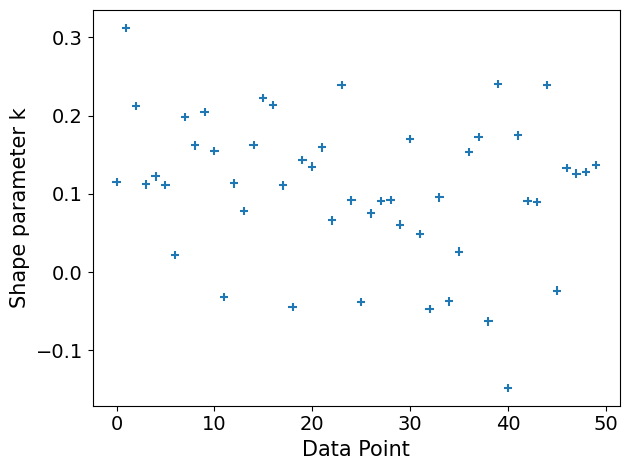

In [27]:
from bayes_ordinal.workflow.sensitivity import (
    prior_sensitivity,
    plot_influential,
)

# 1) Sensitivity of alpha[0] to cuts’ prior std
prior_sensitivity(
    build_model=cumulative_model,
    y=y, X=X, K=K,
    hyper_name="cut_sigma",
    hyper_values=[1, 2, 5, 10],
    trace_var="alpha",
    draws=300,
    tune=300,
    chains=4,
    hdi_prob=0.9,
)

# 2) Influence diagnostics—ArviZ style
plot_influential(idata_full, threshold=0.7, use_az_khat=True)


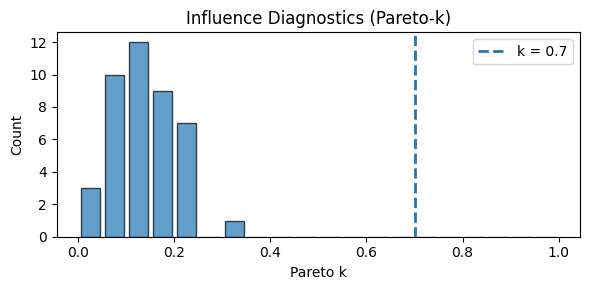

In [29]:
plot_influential(idata_full, threshold=0.7, use_az_khat=False)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Sampling: [beta, gamma, y_obs]


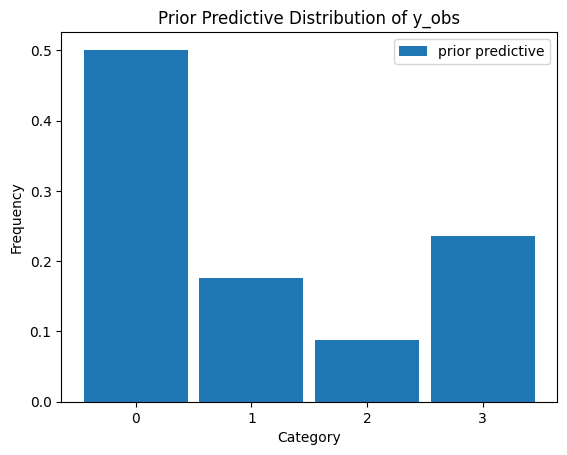

In [31]:
%load_ext autoreload
%autoreload 2

import numpy as np
from bayes_ordinal.models.partial_odds import partial_odds_model
from bayes_ordinal.workflow.prior_predictive import run_prior_predictive

# Tiny fake data
n, K = 50, 4
X = np.random.normal(size=(n, 2))
y = np.random.randint(0, K, size=n)

model2 = partial_odds_model(y, X, K, priors={"gamma_sigma":2, "beta_sigma":2})
idata_pp = run_prior_predictive(model2, draws=100, plot=True)


In [33]:
from bayes_ordinal.workflow.fitting import fit_model

# Smoke‐test to catch any errors quickly
idata_smoke = fit_model(model2, smoke_test=True)

# Then a full run
idata_full = fit_model(model2, draws=500, tune=500)


Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 6100
Interrupted at 6,099 [3%]: Average Loss = 83.931
Sequential sampling (1 chains in 1 job)
NUTS: [gamma, beta]


Sampling 1 chain for 10 tune and 10 draw iterations (10 + 10 draws total) took 0 seconds.
The number of samples is too small to check convergence reliably.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gamma, beta]


Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 0 seconds.


In [35]:
idata_smoke.posterior

<xarray.Dataset>
Dimensions:      (chain: 1, draw: 10, gamma_dim_0: 3, beta_dim_0: 2)
Coordinates:
  * chain        (chain) int64 0
  * draw         (draw) int64 0 1 2 3 4 5 6 7 8 9
  * gamma_dim_0  (gamma_dim_0) int64 0 1 2
  * beta_dim_0   (beta_dim_0) int64 0 1
Data variables:
    gamma        (chain, draw, gamma_dim_0) float64 -0.9059 -0.6793 ... 0.05043
    beta         (chain, draw, beta_dim_0) float64 -0.3007 -0.6897 ... -0.2637
Attributes:
    created_at:                 2025-07-29T20:09:21.136067
    arviz_version:              0.16.1
    inference_library:          pymc
    inference_library_version:  5.3.1
    sampling_time:              0.01463174819946289
    tuning_steps:               10

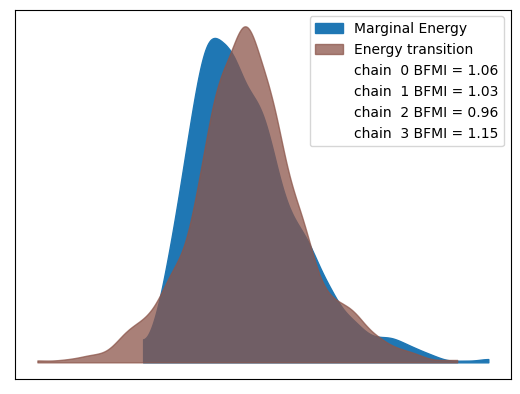

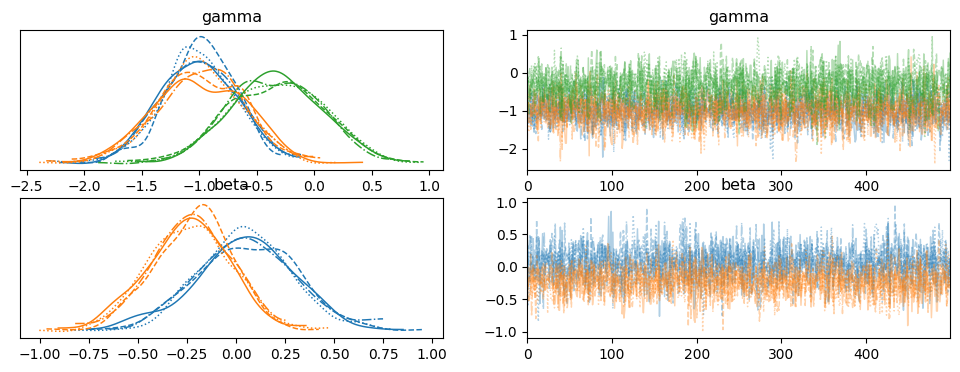

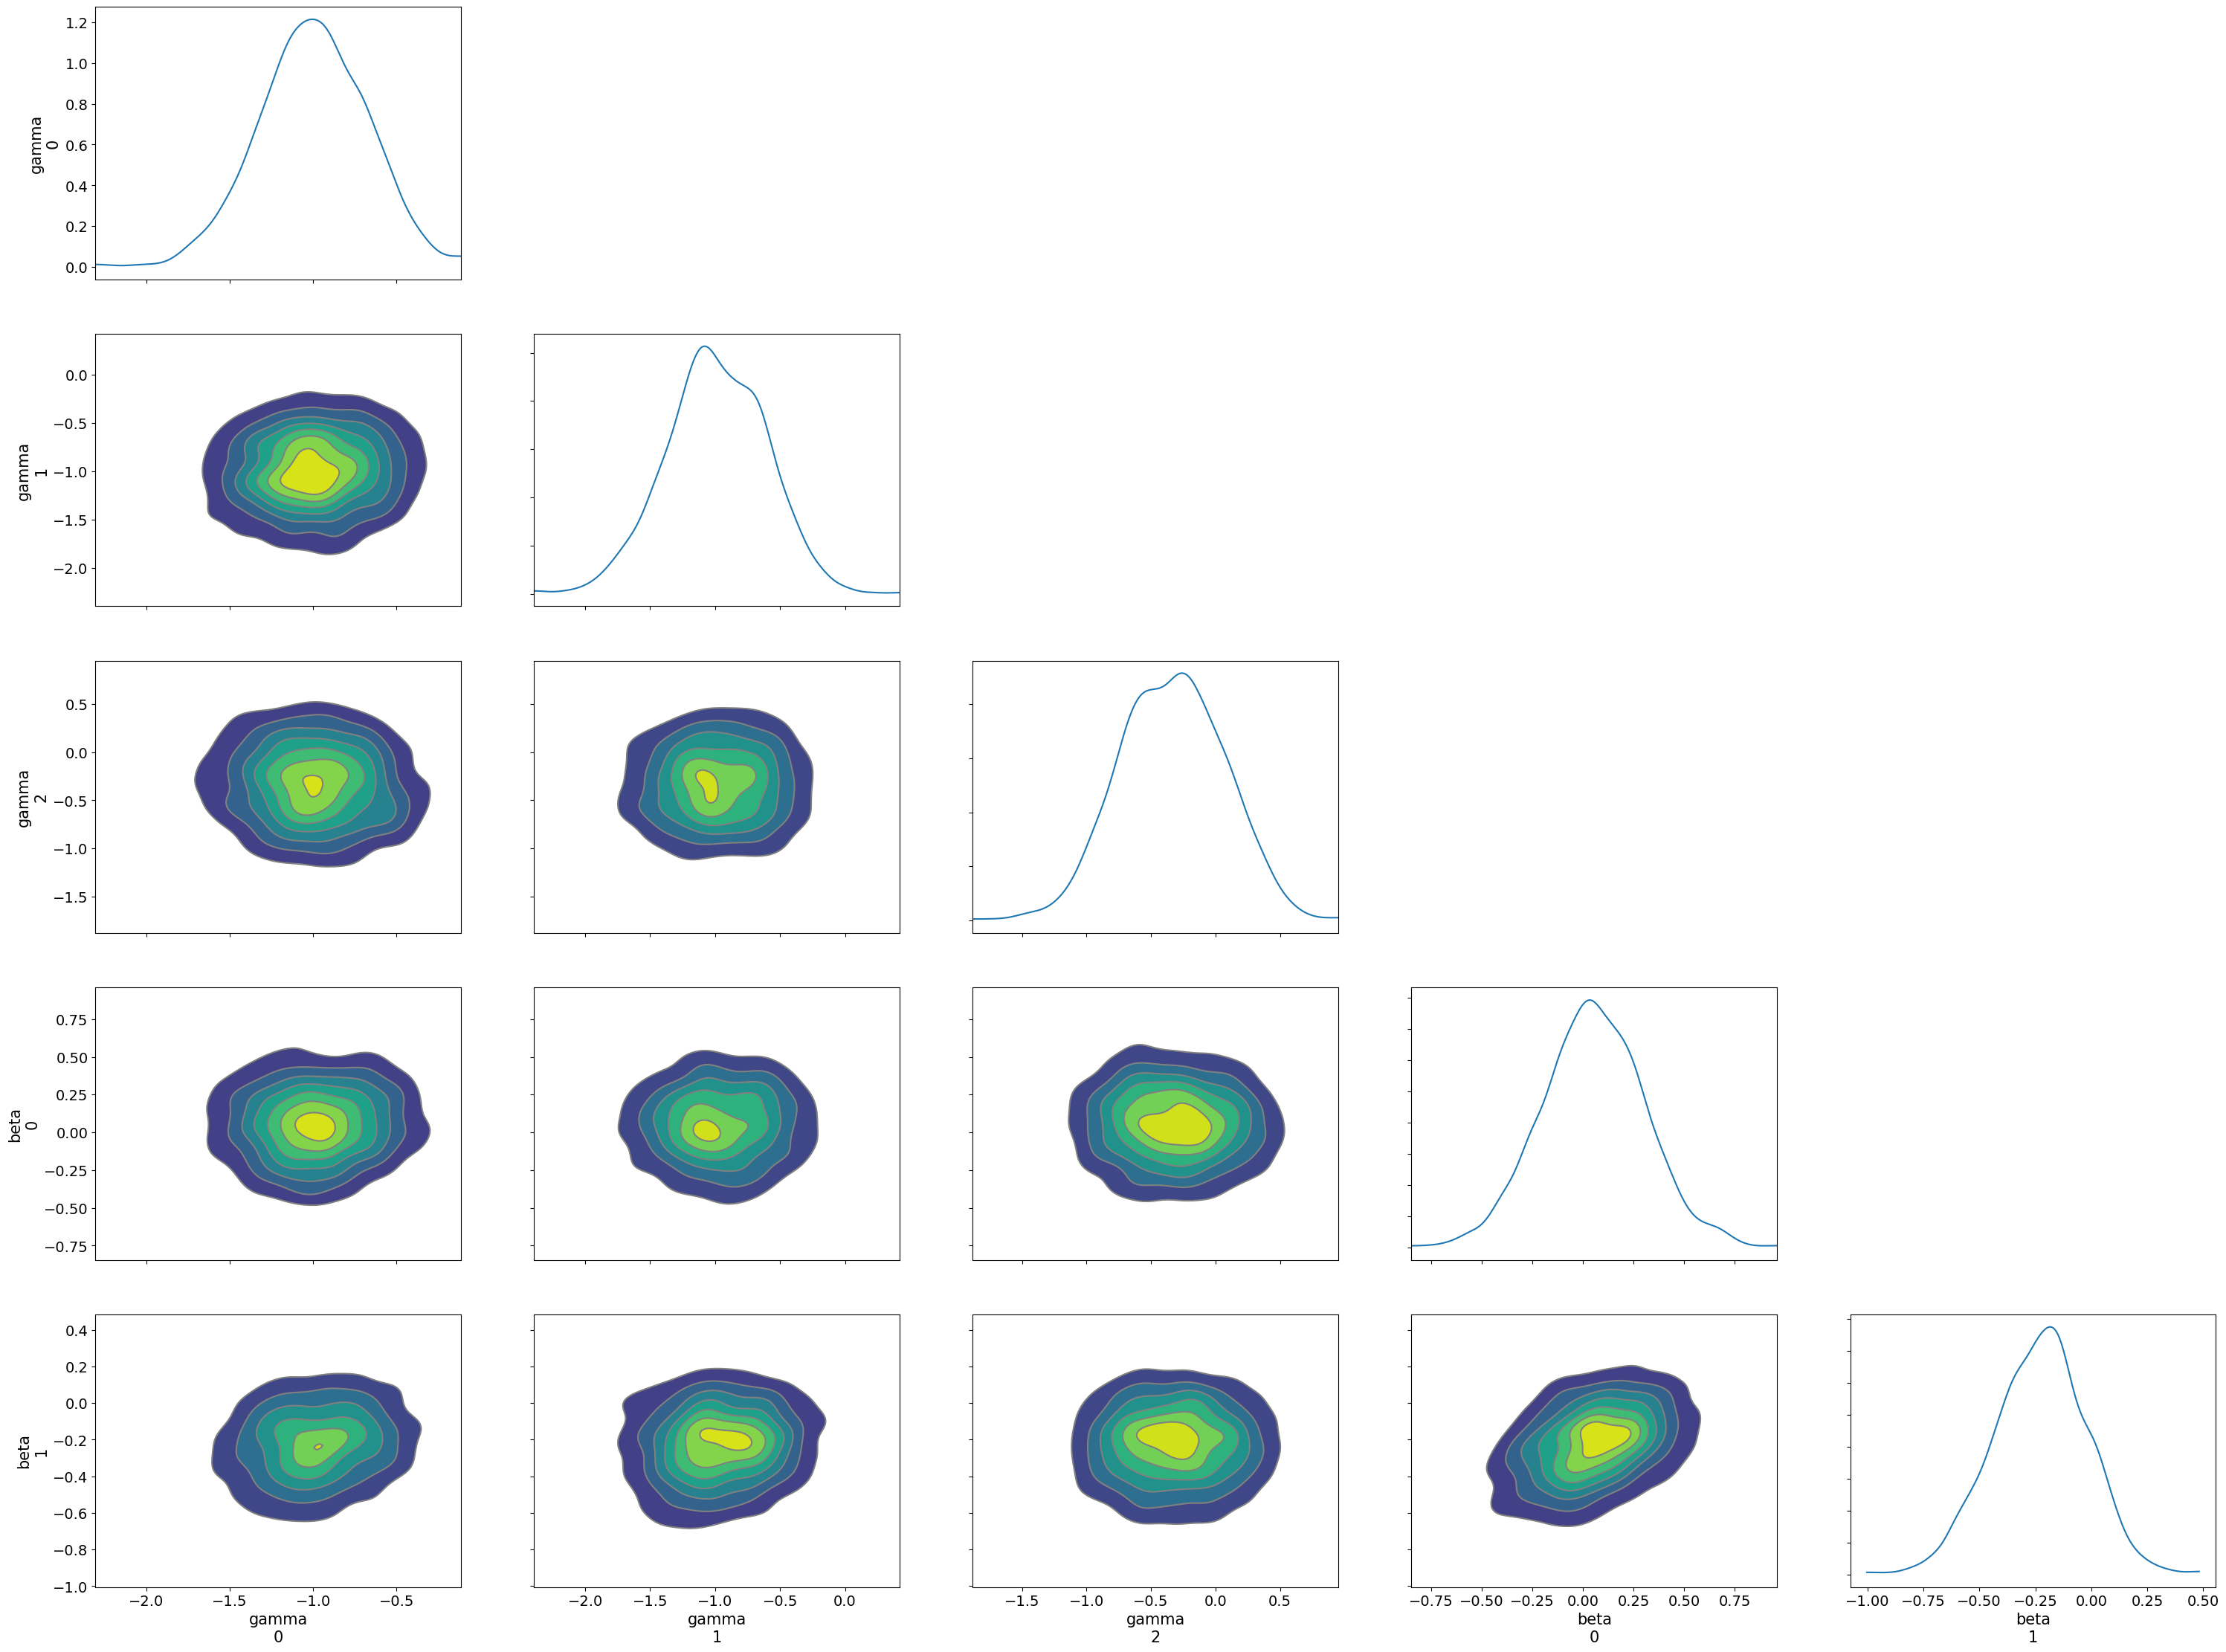

          mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
gamma[0] -1.00  0.32   -1.57    -0.37       0.01     0.00   2426.60   1710.48   
gamma[1] -0.99  0.38   -1.71    -0.29       0.01     0.01   2700.29   1581.78   
gamma[2] -0.34  0.41   -1.07     0.40       0.01     0.01   2527.77   1516.34   
beta[0]   0.05  0.26   -0.45     0.52       0.01     0.01   1956.87   1544.13   
beta[1]  -0.23  0.21   -0.64     0.12       0.00     0.00   1815.83   1595.95   

          r_hat  n_divergences  max_energy_diff  
gamma[0]    1.0              0         8.970316  
gamma[1]    1.0              0         8.970316  
gamma[2]    1.0              0         8.970316  
beta[0]     1.0              0         8.970316  
beta[1]     1.0              0         8.970316  


In [37]:
from bayes_ordinal.workflow.diagnostics import summarize_diagnostics

# Summarize diagnostics for alpha and beta
diag_table = summarize_diagnostics(idata_full, var_names=["gamma", "beta"])
print(diag_table)

Sampling: [y_obs]


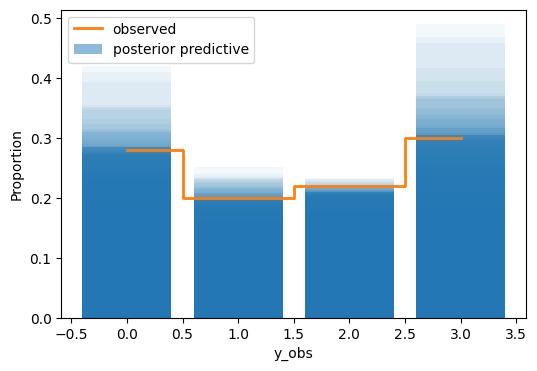

In [41]:
from bayes_ordinal.workflow.posterior_predictive import run_posterior_predictive
# 2) Posterior predictive
pp_idata = run_posterior_predictive(model2, idata_full, var_name="y_obs", kind="proportions")

In [ ]:
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

from bayes_ordinal.models.partial_odds import partial_odds_model
from bayes_ordinal.workflow.prior_predictive import run_prior_predictive
from bayes_ordinal.workflow.fitting import fit_model
from bayes_ordinal.workflow.diagnostics import summarize_diagnostics
from bayes_ordinal.workflow.posterior_predictive import run_posterior_predictive
from bayes_ordinal.workflow.cross_validation import compare_models
from bayes_ordinal.workflow.sensitivity import prior_sensitivity, plot_influential

# 0) Fake data
n, K = 100, 4
X = np.random.normal(size=(n, 2))
y = np.random.randint(0, K, size=n)

# 1) Build & prior‐predict
model_p = partial_odds_model(y, X, K, priors={"gamma_sigma":2, "beta_sigma":2})
idata_pp  = run_prior_predictive(model_p, draws=200, plot=True)

# 2) Fit (smoke + full)
idata_smoke_p = fit_model(model_p, smoke_test=True)
idata_full_p  = fit_model(model_p, draws=500, tune=500)

# 3) Diagnostics: R̂, ESS, divergences, energy‐diff for γ and β
diag_p = summarize_diagnostics(
    idata_full_p,
    var_names=["gamma", "beta"],    # ← note "gamma" not "alpha"
    hdi_prob=0.94
)
print(diag_p)

# 4) Posterior predictive check (histogram overlay)
pp_p = run_posterior_predictive(
    model_p,
    idata_full_p,
    var_name="y_obs",
    kind="hist",     # histogram overlay
    plot=True
)

# 5) LOO‐CV & model comparison
#    (if you've also fit the cumulative model into idata_full_c)
# comp = compare_models(
#     models={"cumul": model_c, "partial": model_p},
#     idatas={"cumul": idata_full_c, "partial": idata_full_p},
#     ic="loo"
# )
# print(comp)
# az.plot_compare(comp)
# plt.show()

# 6) Sensitivity & influence
prior_sensitivity(
    build_model=partial_odds_model,
    y=y, X=X, K=K,
    hyper_name="gamma_sigma",
    hyper_values=[1,2,5,10],
    trace_var="gamma",
    draws=300, tune=300,
)
plot_influential(idata_full_p, threshold=0.7, use_az_khat=False)


In [ ]:
import numpy as np
print(np.__version__)

In [ ]:
import pymc as pm
print("PyMC:", pm.__version__)

In [ ]:
import numpy as np, pymc as pm, pytensor as pt
print(np.__version__, pm.__version__, pt.__version__)